# Problem Statement
The company Visit Us is planning to launch a new product i.e. Wellness Tourism Package. The marketing cost was quite high in the previous expenditure since customers were contacted at random without looking at the available information. For this product campaign, the company wants to harness the available data of existing and potential customers to make the upcoming marketing expenditure more efficient.  

# Objective:
Analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team. Build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Data Description:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import necessary libraries

In [640]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from scipy import stats

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV


### Read the dataset

In [558]:
tour=pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

In [559]:
# copying data to another varaible to avoid any changes to original data
data=tour.copy()

### View the first and last 5 rows of the dataset.

In [560]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [561]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [562]:
data.shape

(4888, 20)

* There are 4888 observations and 20 columns in the dataset

### Search for duplicates

In [563]:
data.duplicated().sum()

0

### Check the data types of the columns for the dataset.


In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations**
* All variables are integer, float, or object types
* There are null values in the dataset
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [565]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [566]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

`the memory usage has decreased from 763.9 KB to 564.4 KB`, this technique is generally useful for bigger datasets.

### Summary of the dataset.

In [568]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* CustomerID is an ID variable and not useful for predictive modelling.
* Age of customer ranges from 18 to 61 and the average age is 38. 
* There is a large difference between the max and min of `DurationOfPitch`which suggest there might be outliers present in the data. 
* Monthly Income has a high range and the difference in min and max indicate that there could be outliers. 



In [569]:
data.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


* There are three unique Gender categories. Will need to dig deeper into the unique values. 
* There are more Males in this data set than Female. 
* Majority of people in this data set are Married. 
* Majority of people in this data set are Executives. 

#### Check for missing values

In [570]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* There are several missing values from the dataset. 

**Review the unqiue values of all the categories**

In [571]:
cols_cat= data.select_dtypes(['category'])

In [572]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

In [573]:
data['Gender'].replace(['Fe Male'],['Female'],inplace=True)

In [574]:
data.describe(include=['object']).T

,count,unique,top,freq
Gender,4888,2,Male,2916


### Data Preprocessing

**Dropping columns which are not adding any information.**

In [575]:
data.drop(['CustomerID'],axis=1,inplace=True)
data.drop(['TypeofContact'],axis=1,inplace=True)

In [576]:
# Reset the dataframe index
data.reset_index(inplace=True, drop=True)

* Process `Age`,and `MonthlyIncome`and etc columns to replace null values. 

In [577]:
#Fill the remaining missing values for Age, Type of Contact, Duration of Pitch etc columns by the column medians
data["Age"].fillna(data.Age.median(), inplace=True)
data["MonthlyIncome"].fillna(data.MonthlyIncome.median(), inplace=True)
data["DurationOfPitch"].fillna(data.DurationOfPitch.median(), inplace=True)
data["NumberOfFollowups"].fillna(data.NumberOfFollowups.median(), inplace=True)
data["PreferredPropertyStar"].fillna(data.PreferredPropertyStar.median(), inplace=True)
data["NumberOfTrips"].fillna(data.NumberOfTrips.median(), inplace=True)
data["NumberOfChildrenVisiting"].fillna(data.NumberOfChildrenVisiting.median(), inplace=True)  

In [578]:
data.isnull().sum()

ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### EDA

### Univariate analysis

In [579]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

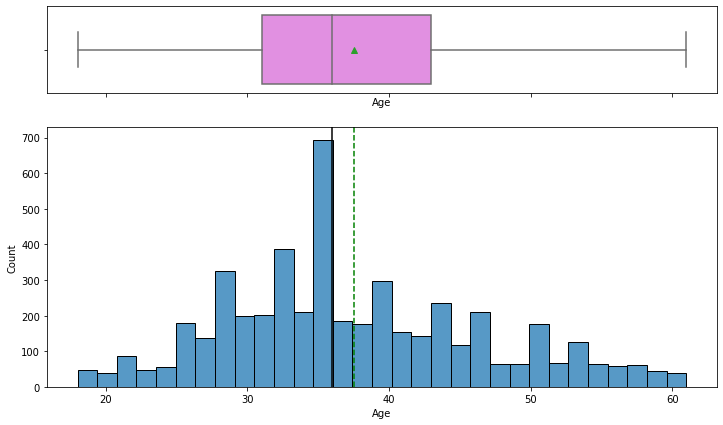

In [580]:
histogram_boxplot(data,'Age')

* Age looks normally distributed, with a hint of right skew.

### Observations on Monthly Income

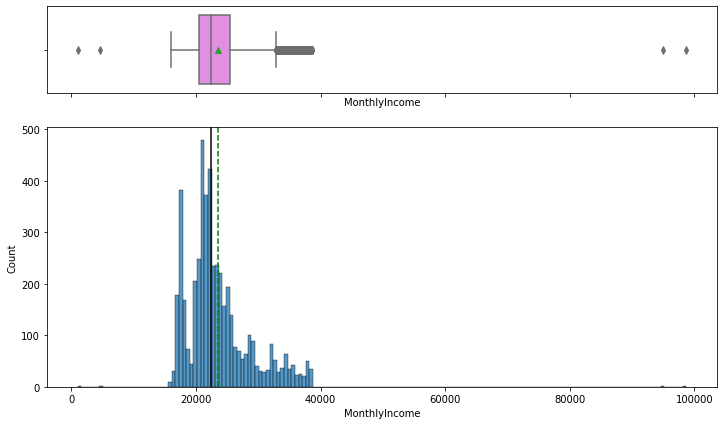

In [581]:
histogram_boxplot(data,'MonthlyIncome')

* Monthly Income looks semi-normally distributed, with a right skew. There are also a few outliers that earn less than 20k/year (making assumption that income is in U.S. dollars)

### Observations on Number of Person Visiting

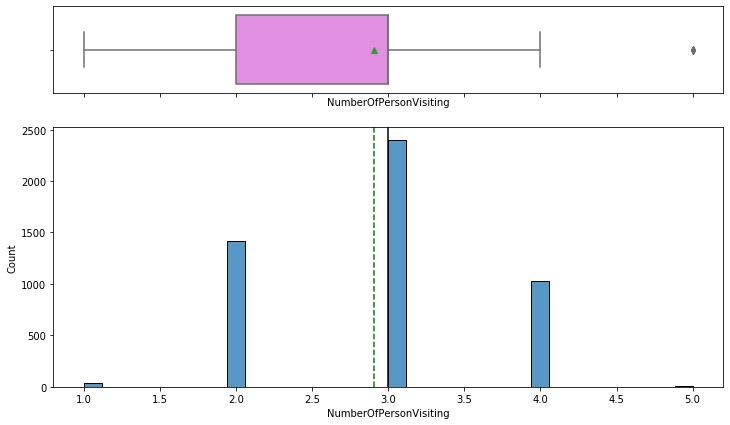

In [582]:
histogram_boxplot(data,'NumberOfPersonVisiting')

* Number of person visiting looks normally distributed with a few outliers greater than 4 and less than 2. On average though, there are 3 people who plan to take the trip with the customer. 

### Observations on Number of Followups

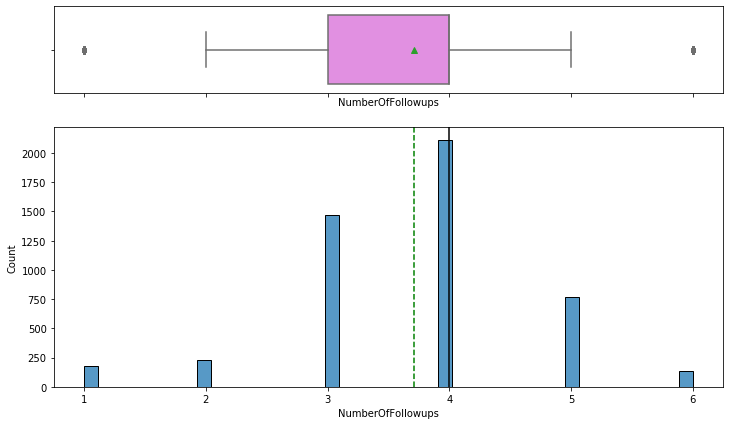

In [583]:
histogram_boxplot(data,'NumberOfFollowups')

* Number of followups looks normally distributed with a few outliers greater than 5 and less than 2. On average though, there are 3.7 followups done by the sales person. 

### Observations on Preferred Property Star

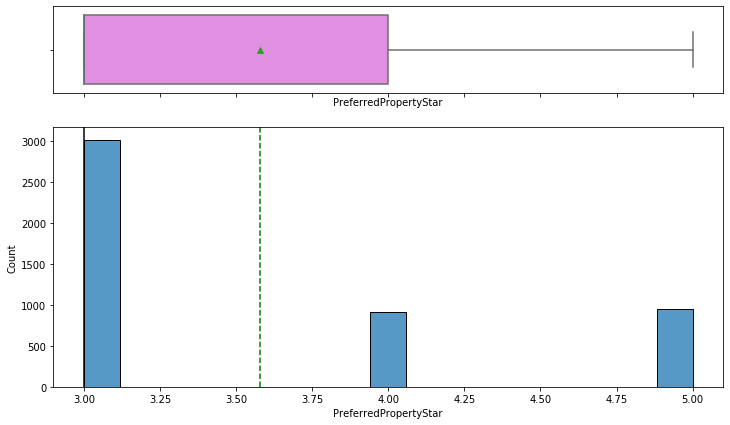

In [584]:
histogram_boxplot(data,'PreferredPropertyStar')        

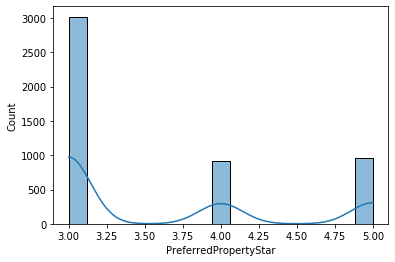

In [585]:
sns.histplot(data, x="PreferredPropertyStar", kde=True)

* Number of followups is not normally distributed. Let's use the log transformation on this column to see if this helps normalize the distribution. 

Text(0.5, 0, 'Log(Preferred Property Star)')

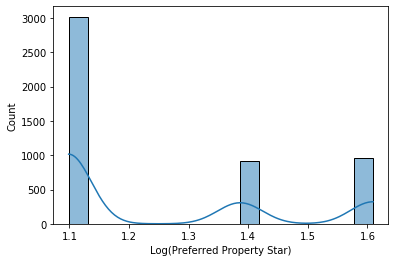

In [586]:
sns.histplot(np.log(data["PreferredPropertyStar"]), kde=True)
plt.xlabel("Log(Preferred Property Star)")

* Using the log transformation did not help in reducing the skew.

### Observations on Number of Children Visiting

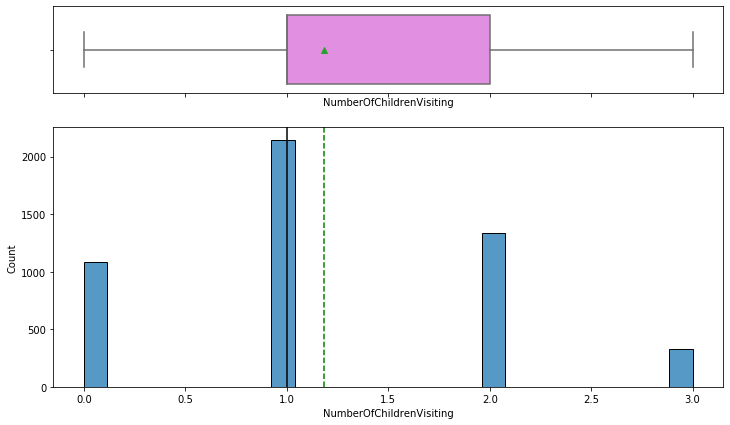

In [587]:
histogram_boxplot(data,'NumberOfChildrenVisiting')             

* Number of children visiting looks semi-normally distributed, with a right skew.The average number of children is just over 1.  

### Observations on Number of Trips

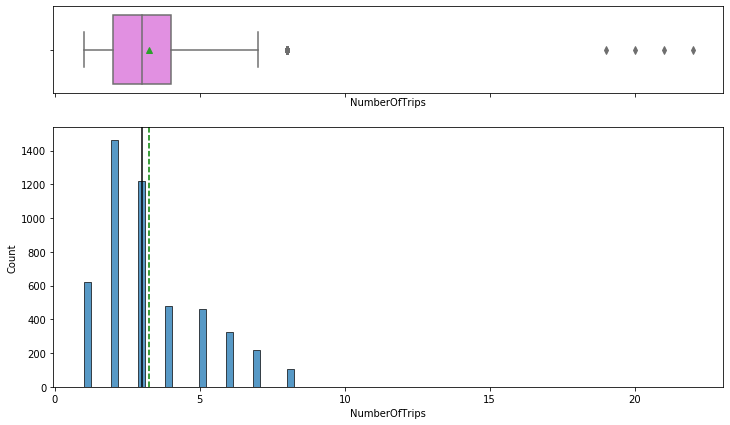

In [588]:
histogram_boxplot(data,'NumberOfTrips')             

* Number of followups looks semi-normally distributed with several outliers. 

### Observations on Passport

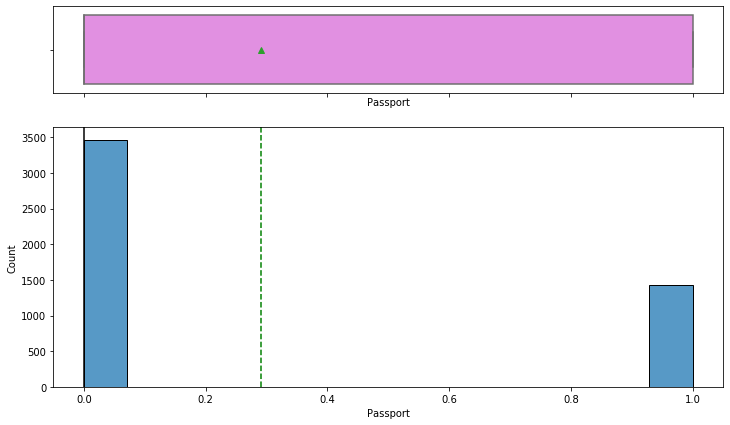

In [589]:
histogram_boxplot(data,'Passport')             

* The data is not normally distributed. There is a greater number of customers that do not have a passport versus those that do not. 

### Reviewing Outliers

* Box plot use the IQR (interquartile range) method to display data and outliers but in order to be get a list of identified outliers, we need to use the mathematical formula and retrieve the outlier data.
* IQR = Q3 - Q1 which is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles or between upper and lower quartiles. 
* Let’s calculate IQR to find the list of outliers for each column 

In [590]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ProdTaken                      0.00
Age                           12.00
CityTier                       2.00
DurationOfPitch               10.00
NumberOfPersonVisiting         1.00
NumberOfFollowups              1.00
PreferredPropertyStar          1.00
NumberOfTrips                  2.00
Passport                       1.00
PitchSatisfactionScore         2.00
OwnCar                         1.00
NumberOfChildrenVisiting       1.00
MonthlyIncome               4939.75
dtype: float64


* Larger scope of outliers exist for Age and Duration of Pitch. Other outliers include City Tier, Number of Trips and Pitch Satisfaction score. 

In [591]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Prod Taken

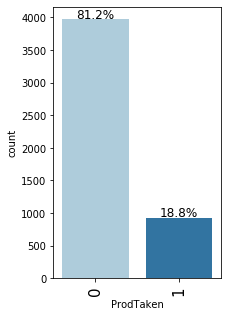

In [592]:
labeled_barplot(data, "ProdTaken", perc=True)

* Only 18.8% of customers have purchased a trip package

### Observations on Occupation

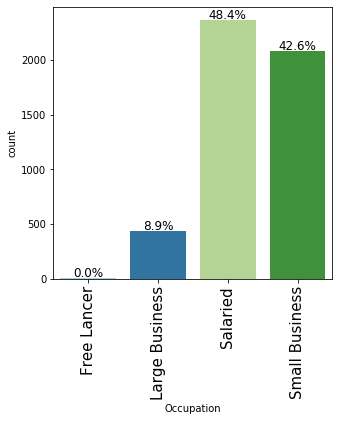

In [593]:
labeled_barplot(data, "Occupation", perc=True)

* 8.9% of customers are part of a Large Business, whereas 48.4% are Salaried. 

### Observations on Gender

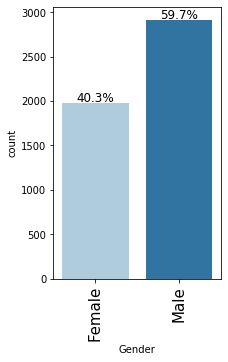

In [594]:
labeled_barplot(data, "Gender", perc=True)

* 59.7% of customers in the data are Male and 40.3% are Female

* 70.5% of customers were self enquiries. Whereas 29.9% were company invited. 

### Observations on Marital Status

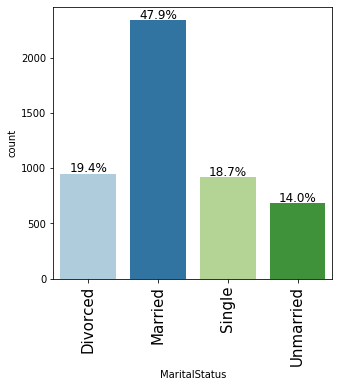

In [596]:
labeled_barplot(data, "MaritalStatus", perc=True)

* 47.9% of customers are married and only 14% are unmarried

### Observations on Product Pitched

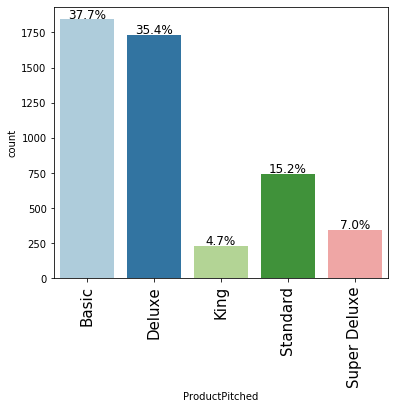

In [597]:
labeled_barplot(data, "ProductPitched", perc=True)

* The Basic product package was picked the most at 37.7% and the lowest product picked was the King at 4.7%
* The Basic and Deluxe package were the two highest products picked

### Observation on Designation

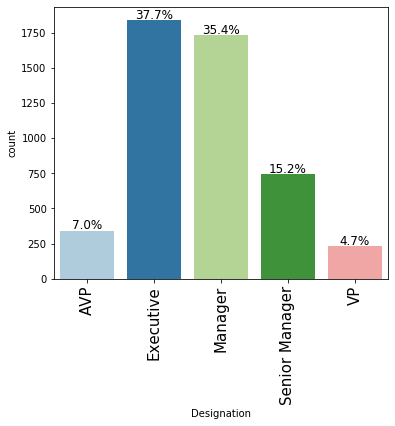

In [598]:
labeled_barplot(data, "Designation", perc=True)

* 37.7% of customers are Executives and 35.4% are Managers. These are top two Designations of customers.
* The lowest designation of customers are VPs at 4.7%

## Bivariate Analysis

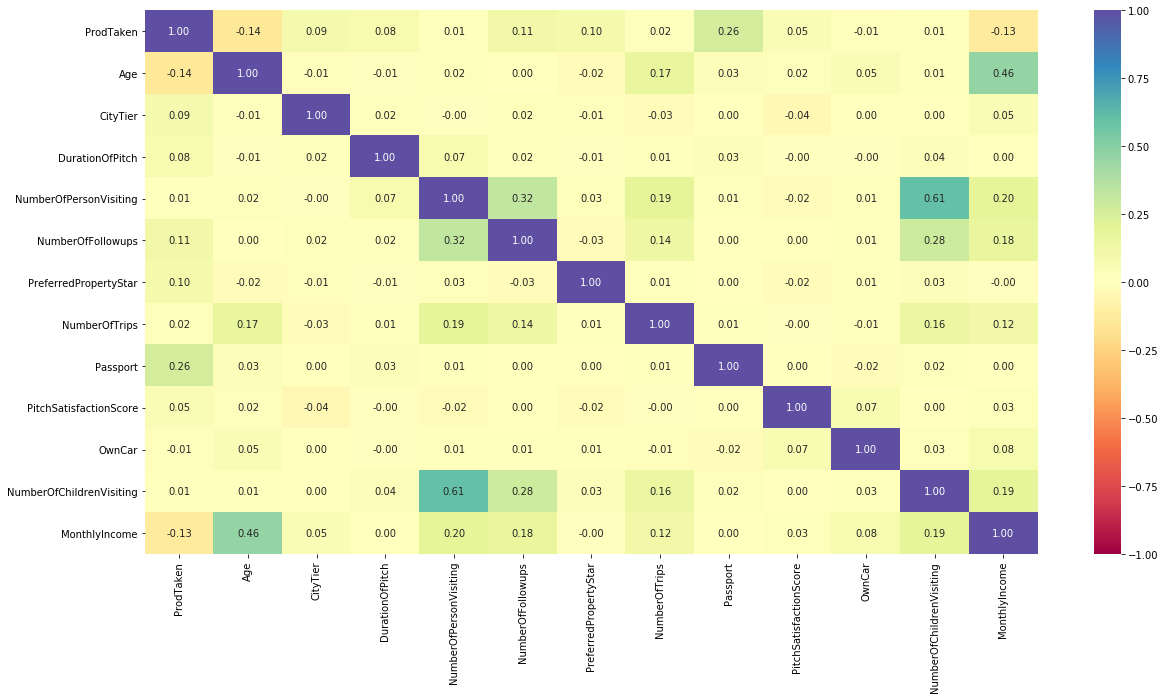

In [599]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

* Positive correlations include the following (in order of strength): 
     * Number of Persons Visiting and Number of Children Visiting which makes sense as additional children would increase total number of people visiting. 
    * Age and Monthly income: The more older a customer, the greater their salary
    * Number of Persons Visiting and Number of Followups
* Negative correlations include: 
    * Monthly Income and Product Taken: As income of a customer decreases, so does the likelyhood of them taking a product
* Number of Followups is completely uncorrelated with Passport and Pitch Satisfaction which makes it harder to understand what these variables might represent. 
* City Tier, Duration of Pitch, Preferred Property Star, Passport and car ownership are almost completely uncorrelated to any of the variables in this dataset which makes it hard to understand what these variables might represent. 
    

In [600]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Observations in Number of Product Taken and Monthly Income

Passport      0     1   All
ProdTaken                  
All        3466  1422  4888
0          3040   928  3968
1           426   494   920
------------------------------------------------------------------------------------------------------------------------


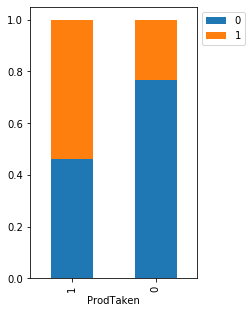

In [601]:
stacked_barplot(data, "ProdTaken", "Passport")

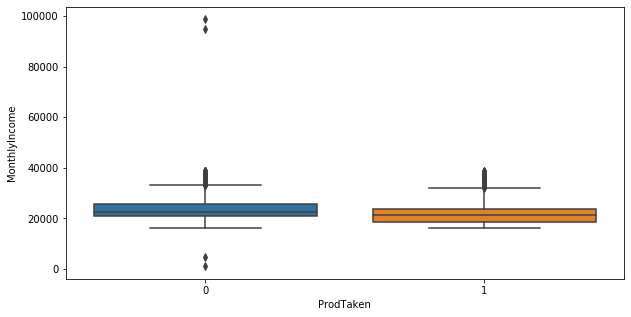

In [602]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["ProdTaken"], data["MonthlyIncome"])
plt.show()

* Interesting correlation in that these two variables are slightly negatively correlated. 
* A majority of customers who purchased a package had incomes between 24k and ~18k. 

### Observations in Prod Taken and Passport

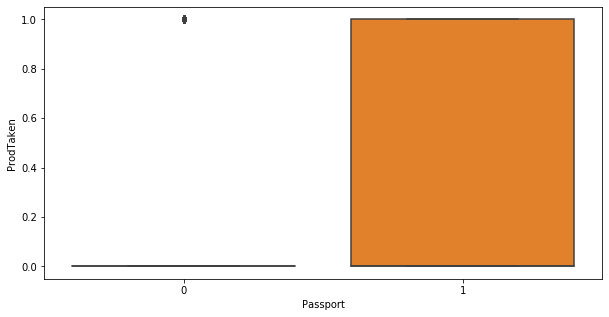

In [603]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Passport"], data["ProdTaken"])
plt.show()

* Interesting observation in that more people with passports purchased a travel package

### Observations in Number of Followups vs. Number of Persons Visiting

NumberOfPersonVisiting   1     2     3     4  5   All
NumberOfFollowups                                    
All                     39  1418  2402  1026  3  4888
4.0                     12   416  1072   611  2  2113
5.0                      0    93   416   258  1   768
1.0                      1    97    78     0  0   176
2.0                      1    30   119    79  0   229
3.0                     25   782   634    25  0  1466
6.0                      0     0    83    53  0   136
------------------------------------------------------------------------------------------------------------------------


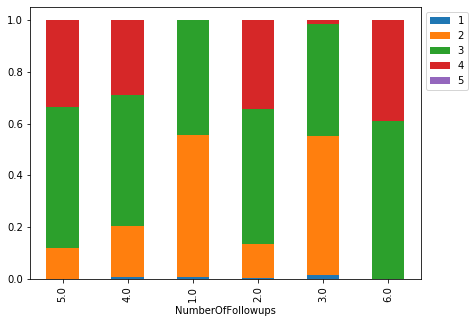

In [604]:
stacked_barplot(data,"NumberOfFollowups","NumberOfPersonVisiting")

* Slight positive correlations between number fo followups vs number of persons visiting. Higher followups did tend to result in increased number of people visiting (3 to 4 people). 

### Observations in Age vs. Monthly Income

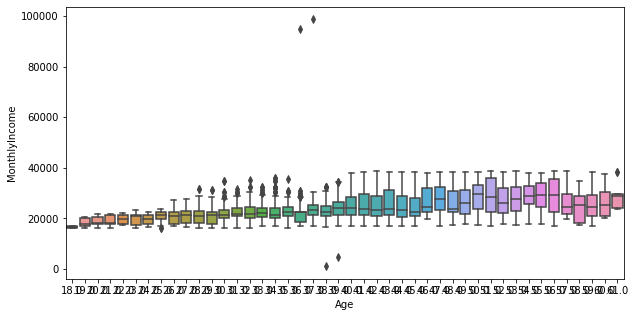

In [605]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Age"], data["MonthlyIncome"])
plt.show()

* An increase in the customer's age shows a graduate increase in Monthly Income but also the distribution of that income to high and low levels. 

### Observations in Number of Persons Visiting vs. Number of Children Visiting

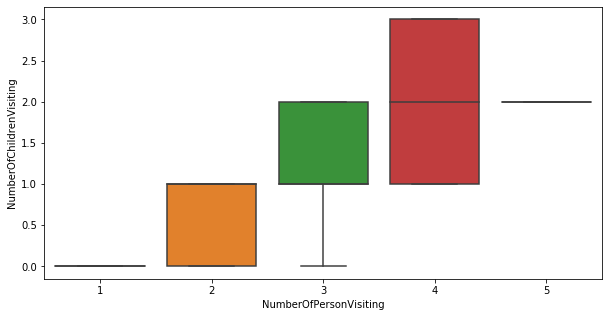

In [606]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["NumberOfPersonVisiting"], data["NumberOfChildrenVisiting"])
plt.show()

### Observations on EDA

* Larger scope of outliers exist for Age and Duration of Pitch. Other outliers include City Tier, Number of Trips and Pitch Satisfaction score. 
* Age looks normally distributed, with a hint of right skew.
* Monthly Income looks semi-normally distributed, with a right skew. There are also a few outliers that earn less than 20k/year (making assumption that income is in U.S. dollars)
* Number of person visiting looks normally distributed with a few outliers greater than 4 and less than 2. On average though, there are 3 people who plan to take the trip with the customer.
* Number of followups is not normally distributed. Let's use the log transformation on this column to see if this helps normalize the distribution.
* 	* Using the log transformation did not help in reducing the skew.
* Number of followups looks semi-normally distributed with several outliers. 
* 8.9% of customers are part of a Large Business, whereas 48.4% are Salaried. 
* 59.7% of customers in the data are Male and 40.3% are Female
* The data is not normally distributed. There is a greater number of customers that do not have a passport versus those that do not.
* 70.5% of customers were self enquiries. Whereas 29.9% were company invited. 
* 47.9% of customers are married and only 14% are unmarried
* The Basic product package was picked the most at 37.7% and the lowest product picked was the King at 4.7%
* The Basic and Deluxe package were the two highest products picked
* 37.7% of customers are Executives and 35.4% are Managers. These are top two Designations of customers.
	* The lowest designation of customers are VPs at 4.7%

* Positive correlations include the following (in order of strength): 
     * Number of Persons Visiting and Number of Children Visiting which makes sense as additional children would increase total number of people visiting. 
    * Age and Monthly income: The more older a customer, the greater their salary
    * Number of Persons Visiting and Number of Followups
* Negative correlations include: 
    * Monthly Income and Product Taken: As income of a customer decreases, so does the likelyhood of them taking a product
    * A majority of customers who purchased a package had incomes between 24k and ~18k. 
* Slight positive correlations between number fo followups vs number of persons visiting. Higher followups did tend to result in increased number of people visiting (3 to 4 people). 
* An increase in the customer's age shows a graduate increase in Monthly Income but also the distribution of that income to high and low levels. 


## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* ProdTaken is the dependent variable

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [607]:
X = data.drop('ProdTaken',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken'] 

In [608]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 27) (1467, 27)


In [609]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [610]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will purchase a package and the customer does not. 
2. Predicting an customer will not purchase a package and they do. 

### Which case is more important? 
* Predicting that customer will purchase a package. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives to sell more packages thereby optimizing the overall project cost in selling the new wellness package.

In [611]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [612]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.882072  0.65942   0.697318  0.67784


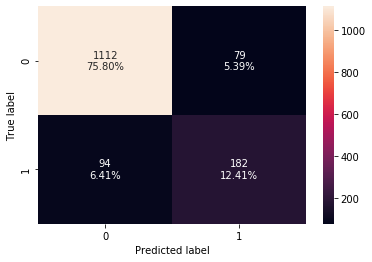

In [613]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

#### Hyperparameter Tuning

In [614]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.18, 1: 0.72},
                       criterion='gini', max_depth=6, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.882072  0.65942   0.697318  0.67784


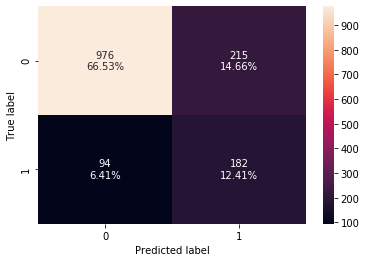

In [615]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The overfitting has reduced and the test f1-score has remained the same.
* Let's try some other models.

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.918882  0.601449   0.948571  0.736142


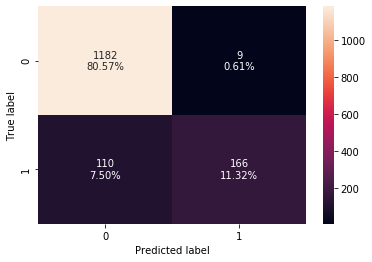

In [620]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is still overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

#### Hyperparameter Tuning

In [622]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)



In [624]:
# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.18, 1: 0.82}, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=12, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=True,
                       random_state=1, verbose=0, warm_start=False)

Training performance:
    Accuracy    Recall  Precision        F1
0    0.9696  0.981366   0.872928  0.923977
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.893661  0.688406   0.730769  0.708955


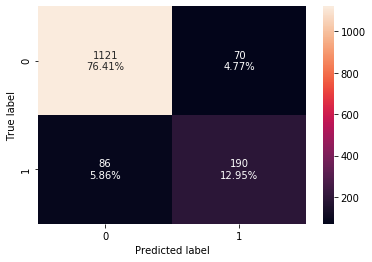

In [625]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced some and the model performance has improved. 
* The test recall has increased but the test F1 scores have decreased slightly. 

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.994154  0.968944        1.0  0.984227
   Accuracy    Recall  Precision        F1
0  0.916155  0.623188   0.900524  0.736617


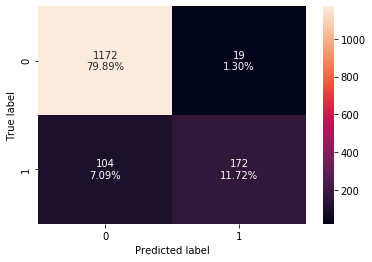

In [554]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

#### Hyperparameter Tuning

In [555]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

   Accuracy    Recall  Precision        F1
0  0.999415  0.996894        1.0  0.998445
   Accuracy    Recall  Precision        F1
0  0.920245  0.619565   0.934426  0.745098


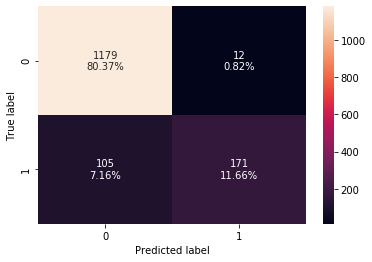

In [556]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* Hyperparameter tuning has not reduced the overfitting of the training data. However, the F1 score has slightly increased. 
* Attempting a round of Boosting models to improve performance

## Building the model
- We are going to build 3 ensemble models: AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### Adaboost Classifier

   Accuracy    Recall  Precision        F1
0  0.847413  0.319876   0.710345  0.441113
   Accuracy    Recall  Precision        F1
0  0.847989  0.315217   0.719008  0.438287


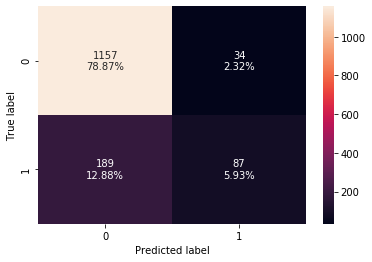

In [629]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low.

#### Hyperparameter Tuning

In [630]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

   Accuracy    Recall  Precision        F1
0    0.9924  0.968944   0.990476  0.979592
   Accuracy    Recall  Precision        F1
0  0.869802  0.601449   0.672065  0.634799


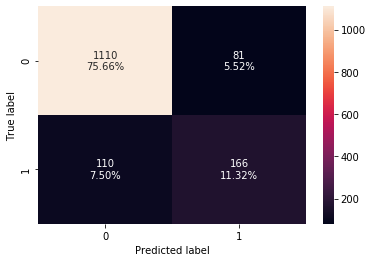

In [631]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The model performance has improved significantly (performance is doubled). 
* Training data is being overfitted though

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.881321  0.437888   0.865031  0.581443
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.863667  0.380435   0.783582  0.512195


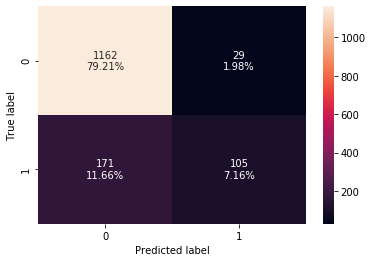

In [632]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifer has pretty low recall and F1 scores in the testing data. 

#### Hyperparameter Tuning

In [645]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

Training performance:
    Accuracy    Recall  Precision        F1
0   0.91786  0.613354   0.925059  0.737628
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.880027  0.48913   0.794118  0.605381


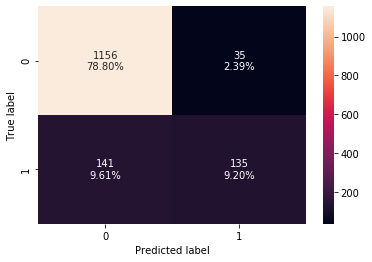

In [646]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* Recall has improved with the hyperameter tuning of the Gradient Booster Classifier. 
* The F1 score has also improved

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999415  0.996894        1.0  0.998445
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.921609  0.67029   0.885167  0.762887


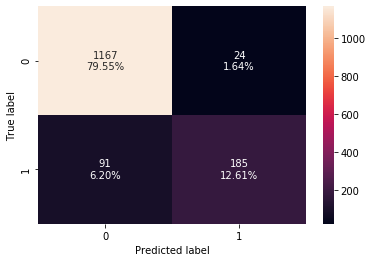

In [636]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* Overfitting is occuring on the training data
* F1 score for the testing data is also high with Recall being ok. 

#### Hyperparameter Tuning

In [637]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.97223  0.995342   0.874488  0.931009
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.891616  0.778986   0.686901  0.730051


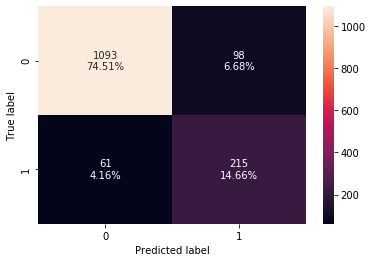

In [638]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* Hyperparameter tuning slightly increased model performance. 
* Recall increased for testing data but unfortunately the F1 score had a slight decrease. 

### Stacking Classifier

In [641]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       criterion='gini',
                                                       max_depth=20,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                     

Training performance:
    Accuracy    Recall  Precision        F1
0  0.940661  0.993789   0.762813  0.863115
Testing performance:
    Accuracy   Recall  Precision       F1
0  0.866394  0.84058   0.604167  0.70303


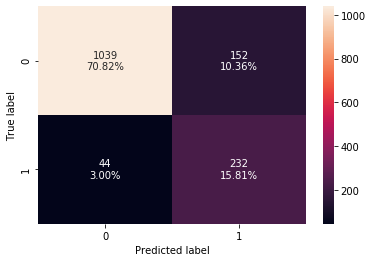

In [642]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* Model performance is better than XGBoost in addition to Recall performance for testing data. 
* However, F1 score for testing data is lower than XGBoost tuning F1 score. 

### Comparing all the models

In [647]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,1.0,0.969600,0.994154,0.999415,0.847413,0.992400,0.881321,0.917860,0.999415,0.972230,0.940661
Recall,1.0,1.0,1.0,0.981366,0.968944,0.996894,0.319876,0.968944,0.437888,0.613354,0.996894,0.995342,0.993789
Precision,1.0,1.0,1.0,0.872928,1.000000,1.000000,0.710345,0.990476,0.865031,0.925059,1.000000,0.874488,0.762813
F1,1.0,1.0,1.0,0.923977,0.984227,0.998445,0.441113,0.979592,0.581443,0.737628,0.998445,0.931009,0.863115


In [648]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.882072,0.882072,0.918882,0.893661,0.916155,0.920245,0.847989,0.869802,0.863667,0.880027,0.921609,0.891616,0.866394
Recall,0.659420,0.659420,0.601449,0.688406,0.623188,0.619565,0.315217,0.601449,0.380435,0.489130,0.670290,0.778986,0.840580
Precision,0.697318,0.697318,0.948571,0.730769,0.900524,0.934426,0.719008,0.672065,0.783582,0.794118,0.885167,0.686901,0.604167
F1,0.677840,0.677840,0.736142,0.708955,0.736617,0.745098,0.438287,0.634799,0.512195,0.605381,0.762887,0.730051,0.703030


* The majority of the models are overfitting the training data in terms of f1-score.
* The XGBoost Classifier is giving the highest f1-score on the test data but is overfitting the training data.
* The tuned bagging estimator has given the second-highest test f1-score and has comparable performance when compared to the bagging classifier.

#### Feature importance of XGBoost Classifier

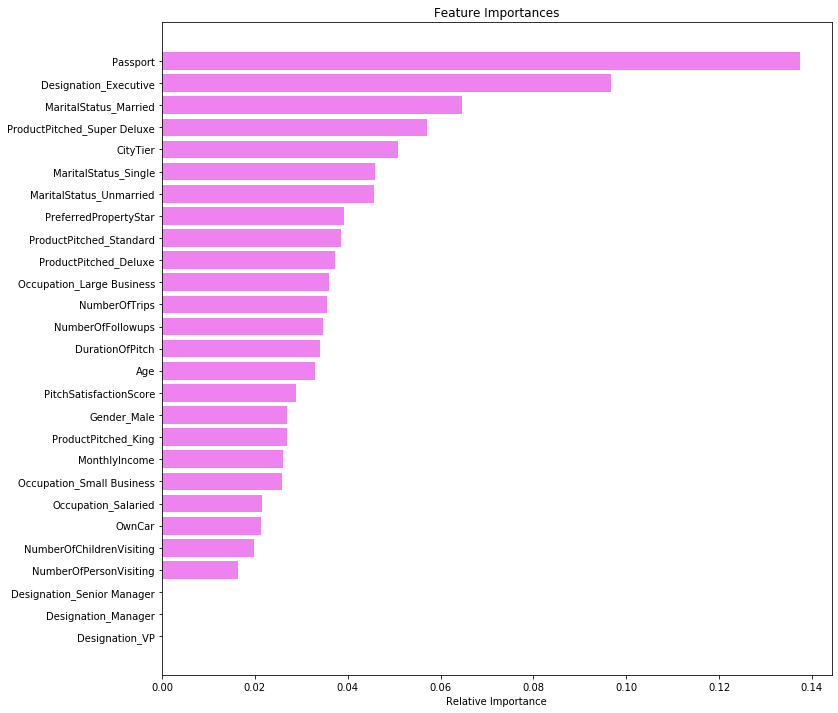

In [651]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport is the most important feature in identifying whether a customer will purchase a package or not. 
* Second and third important features are the Executive Designation and Married status. 

### Conclusion

* Based on the analysis, we can say that those who purchased a vacation package from the company have the following features in comparison to those that did not: 
    * Contain a passport
    * Are an Executive Designation 
    * Married
* The company should be hone more in on Married executives with passports for as these are the most important factors in determining the customer base most likely to purchase a wellness package.  